In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns

In [2]:
data=os.listdir("Testing\\Training")
classes={"Yes":1,"no_tumor":0}

In [3]:
data

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor', 'Yes']

In [4]:
#check value

In [5]:
classes

{'Yes': 1, 'no_tumor': 0}

In [6]:
#data load classification

In [7]:
x = []
y = []
for cls in classes:
    path = r"Testing/Training/"+cls
    for j in os.listdir(path):
        img = cv2.imread(path+"/"+j,0)
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(classes[cls])
        

In [8]:
#check output value 

In [9]:
np.unique(y)

array([0, 1])

In [10]:
#convert array

In [11]:
x=np.array(x)
y=np.array(y)


In [12]:
#data visualizatio

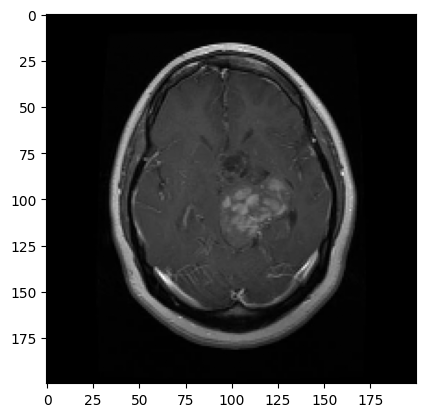

In [13]:
plt.imshow(x[0], cmap="gray")
plt.show()

In [14]:
#output vlue count series jo ke y m save hai ke ketni 1 hao or 0

In [15]:
pd.Series(y).value_counts()

1    2475
0     395
Name: count, dtype: int64

In [16]:
#data preparation:-

In [17]:
x.shape  #check input shape  (row,pixl,pixl)

(2870, 200, 200)

In [18]:
updated_x = x.reshape(len(x),-1) # -1  to convet data one D .using flatten 2d change 1d
updated_x.shape

(2870, 40000)

In [19]:
updated_x[0]

array([0, 0, 0, ..., 0, 0, 0], shape=(40000,), dtype=uint8)

In [20]:
#

In [23]:
!pip install scikit-learn

from sklearn.model_selection import train_test_split

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.7 MB 1.9 MB/s eta 0:00:05
   ---- ----------------------------------- 1.0/8.7 MB 1.9 MB/s eta 0:00:04
   ------- -------------------------------- 1.6/8.7 MB 2.0 MB/s eta 0:00:04
   --------- ------------------------------ 2.1/8.7 MB 2.1 MB/s eta 0:00:04
   ------------ --------------------------- 2.6/8.7 MB 2.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.4/8.7 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 3.9/8.7 MB 2.3 MB/s eta 0:00:03
   -------------------- ------------------- 4.5/8.7 MB 2.4 MB/s eta 0:00:02
   ---------------------- ----------------- 5.0/8.7 MB 2.4 MB/s eta 0:00:02
   ------------------------- -------------- 5.5/8.7 MB 2.4 MB/s eta 0:00:02
   --------------------------- ------------ 6.0/8.7 MB 2.4 MB/s eta 0:00:02
   -----------------------


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
x_train,x_test,y_train,y_test = train_test_split(updated_x,y,test_size=0.2,random_state=10)

In [25]:
x_train.shape,y_train.shape

((2296, 40000), (2296,))

In [26]:
x_test.shape,y_test.shape

((574, 40000), (574,))

In [27]:
#sperate 

In [28]:
x_train = x_train/255
x_test = x_test/255

In [29]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(2296, 40000))

In [30]:
x_test

array([[0.        , 0.        , 0.        , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.02745098, 0.02745098, 0.02745098, ..., 0.03137255, 0.03137255,
        0.02745098],
       [0.23921569, 0.1254902 , 0.12941176, ..., 0.00784314, 0.00392157,
        0.11764706],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(574, 40000))

In [31]:
#model testing

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [33]:
model_name = {
    "logistic" :LogisticRegression(),
    "Random" :RandomForestClassifier(),
"Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC()
}


logistic = 0.9285714285714286


c:\Users\Vanshika\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


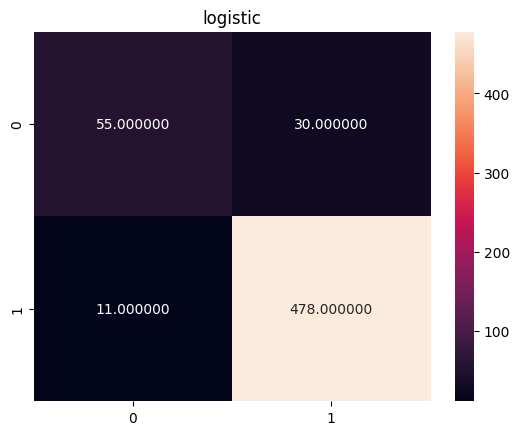

Random = 0.9512195121951219


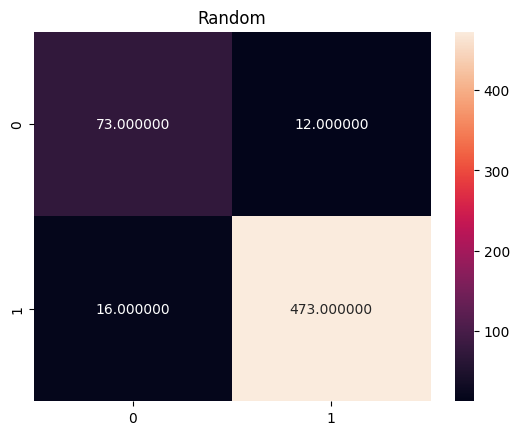

Decision Tree = 0.9320557491289199


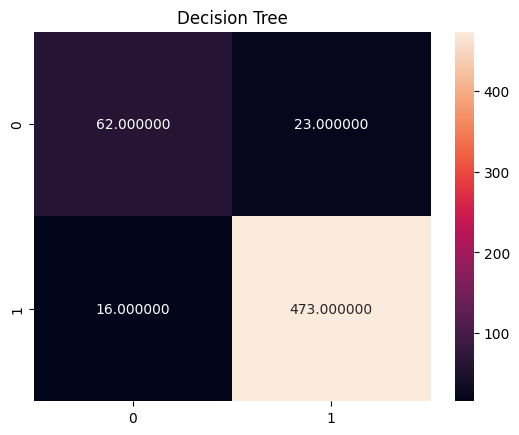

SVM = 0.9181184668989547


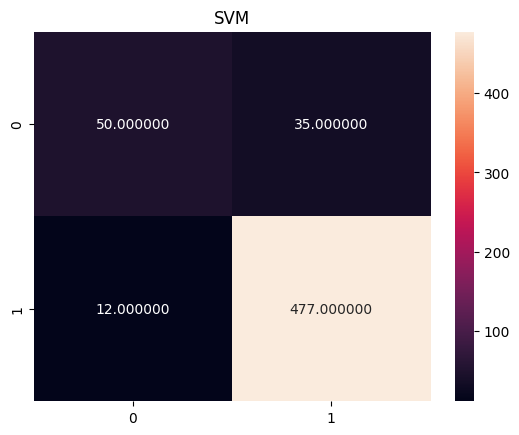

In [34]:
for model_names,model in model_name.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{model_names} = {accuracy_score(y_test,y_pred)}")
    confusion_mat = confusion_matrix(y_test,y_pred)
    sns.heatmap(confusion_mat,annot = True,fmt = "2f")
    plt.title(f"{model_names}")
    plt.show()
    

In [28]:
random_forest_model = RandomForestClassifier()

In [29]:
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
print(f"Training Accuracy {random_forest_model.score(x_train,y_train)}")
print(f"Testing Accuracy {random_forest_model.score(x_test,y_test)}")

Training Accuracy 1.0
Testing Accuracy 0.9529616724738676


In [31]:
import joblib

In [ ]:
joblib.dump(random_forest_model,"brain_tumor_model.joblib")

['brain_tumor_model.joblib']

In [32]:
desc={1 : "positive_Tumor",0 : "no_Tumor" }

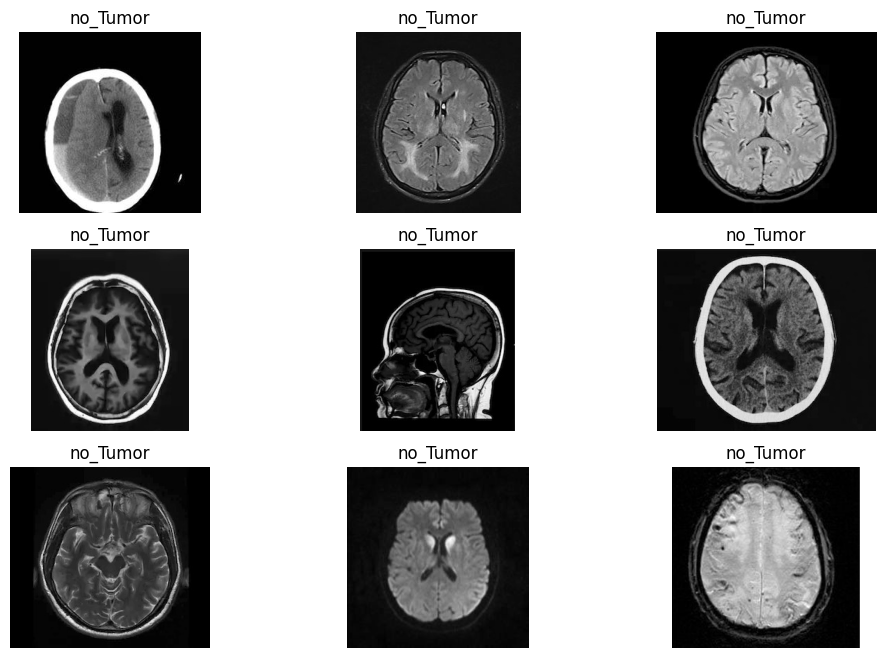

In [33]:
new_img = os.listdir("Testing/Testing/no_tumor/")
plt.figure(figsize=(12,8))
c=1
for i in os.listdir("Testing/Testing/no_tumor/")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("Testing/Testing/no_tumor/"+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=random_forest_model.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img,cmap ="gray")
    
    plt.axis("off")
    c += 1

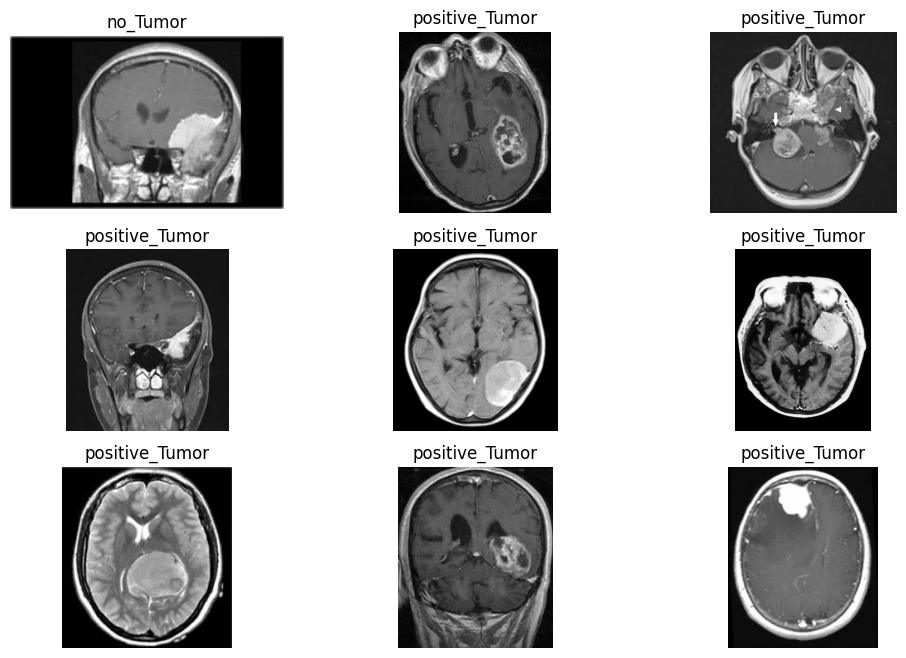

In [ ]:
new_img = os.listdir("Testing/Testing/meningioma_tumor/")
plt.figure(figsize=(12,8))
c=1
for i in os.listdir("Testing/Testing/meningioma_tumor/")[:9]:
    plt.subplot(3,3,c)
    img=cv2.imread("Testing/Testing/meningioma_tumor/"+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=random_forest_model.predict(img1)
    plt.title(desc[p[0]])
    plt.imshow(img,cmap ="gray")
    
    plt.axis("off")
    c += 1